In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from Modules.HelperFunctions import *
import pandas as pd

# CONSTANTS
from pathlib import Path
import csv
# Get the directory of the current file
current_dir = Path().cwd()
output_dir = current_dir.parent/'output'


# Part I

## BoxPlots

In [382]:
LinReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LinReg.csv')
LogReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LogReg.csv')
BCE_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNBCE.csv')
MRLoss_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNMR.csv')

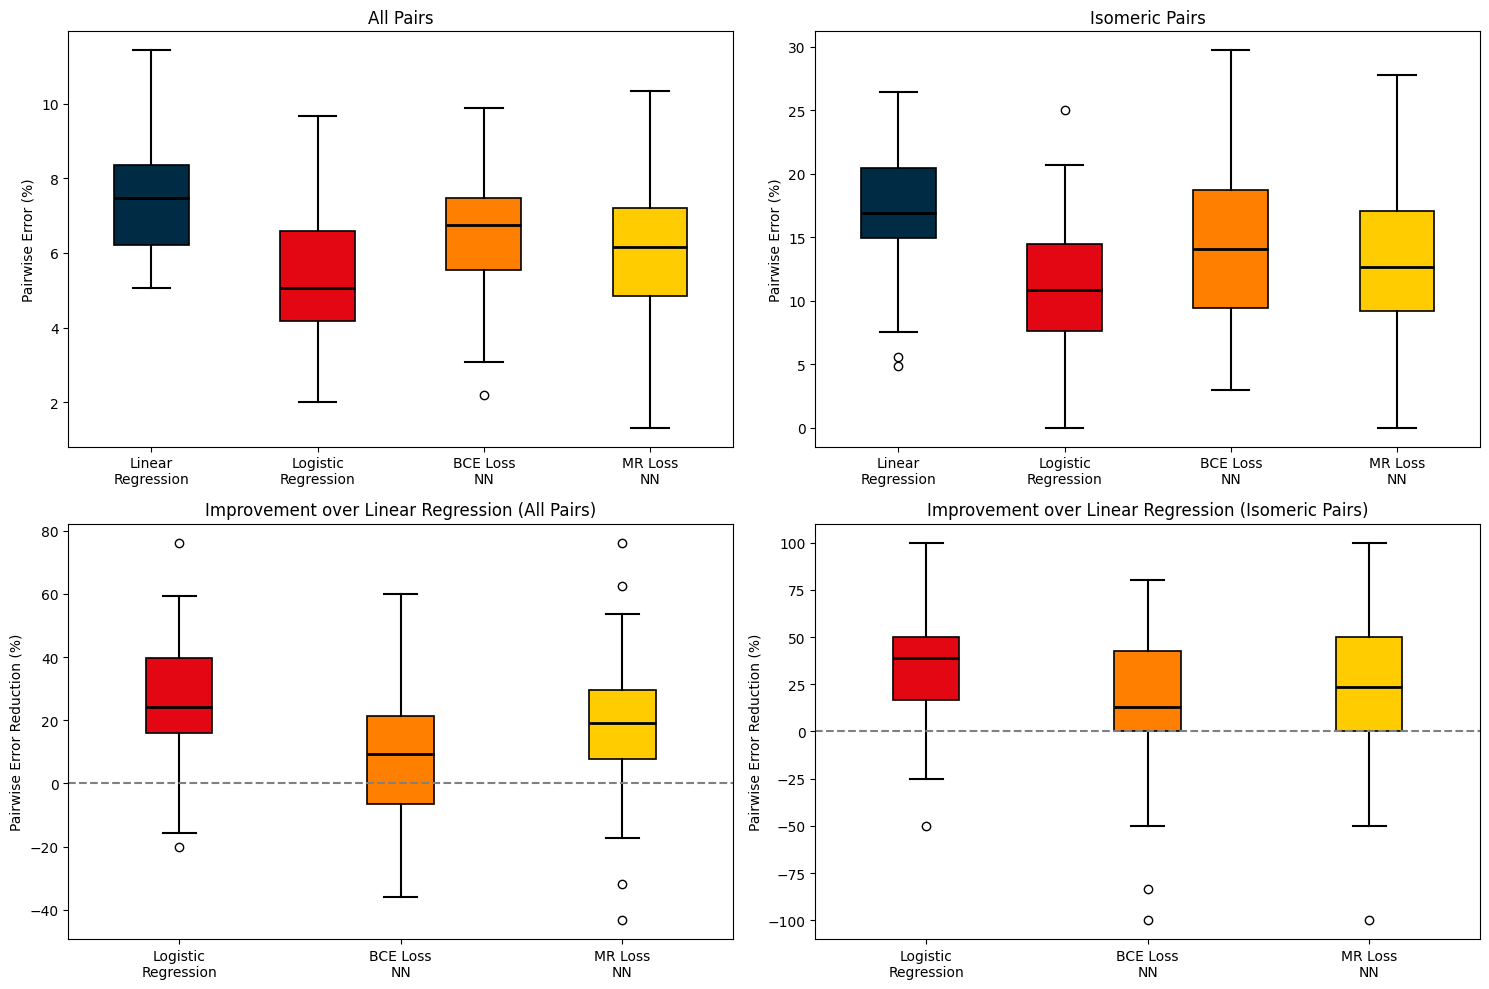

In [383]:
# Setup model names and colors
model_names_all = ['Linear\nRegression', 'Logistic\nRegression', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_all = ['#002b45', '#e30613', '#ff7f00', '#ffcc00']

model_names_sub = ['Logistic\nRegression', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_sub = ['#e30613', '#ff7f00', '#ffcc00']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: All Pairs (raw PER)
i = 1
PER_data1 = [LinReg_nested[:, i]*100, LogReg_nested[:, i]*100, BCE_nested[:, i]*100, MRLoss_nested[:, i]*100]
box1 = axes[0, 0].boxplot(PER_data1, patch_artist=True)
for patch, color in zip(box1['boxes'], colors_all):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box1['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box1['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box1['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[0, 0].set_title('All Pairs')
axes[0, 0].set_ylabel('Pairwise Error (%)')
axes[0, 0].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 0].set_xticklabels(model_names_all)

# Plot 2: Isomeric Pairs (raw PER *100)
i = 3
PER_data2 = [LinReg_nested[:, i]*100, LogReg_nested[:, i]*100, BCE_nested[:, i]*100, MRLoss_nested[:, i]*100]
box2 = axes[0, 1].boxplot(PER_data2, patch_artist=True)
for patch, color in zip(box2['boxes'], colors_all):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box2['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box2['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box2['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[0, 1].set_title('Isomeric Pairs')
axes[0, 1].set_ylabel('Pairwise Error (%)')
axes[0, 1].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 1].set_xticklabels(model_names_all)

# Plot 3: Improvement vs Linear Regression (All Pairs)
i = 1
baseline = LinReg_nested[:, i]
PER_data3 = [
    100 * (baseline - LogReg_nested[:, i]) / baseline,
    100 * (baseline - BCE_nested[:, i]) / baseline,
    100 * (baseline - MRLoss_nested[:, i]) / baseline,
]
box3 = axes[1, 0].boxplot(PER_data3, patch_artist=True)
for patch, color in zip(box3['boxes'], colors_sub):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box3['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box3['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box3['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 0].set_title('Improvement over Linear Regression (All Pairs)')
axes[1, 0].set_ylabel('Pairwise Error Reduction (%)')
axes[1, 0].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 0].set_xticklabels(model_names_sub)

# Plot 4: Improvement vs Linear Regression (Isomeric Pairs)
i = 3
baseline = LinReg_nested[:, i]
PER_data4 = [
    100 * (baseline - LogReg_nested[:, i]) / baseline,
    100 * (baseline - BCE_nested[:, i]) / baseline,
    100 * (baseline - MRLoss_nested[:, i]) / baseline,
]
box4 = axes[1, 1].boxplot(PER_data4, patch_artist=True)
for patch, color in zip(box4['boxes'], colors_sub):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box4['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box4['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box4['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 1].set_title('Improvement over Linear Regression (Isomeric Pairs)')
axes[1, 1].set_ylabel('Pairwise Error Reduction (%)')
axes[1, 1].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 1].set_xticklabels(model_names_sub)

plt.tight_layout()
plt.show()
# fig.savefig("BoxPlots.png", dpi=600, bbox_inches='tight')

## Actual values

### Linear Regression

In [384]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LinReg_nested[:, 0]), np.std(LinReg_nested[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(LinReg_nested[:, 1]), np.std(LinReg_nested[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LinReg_nested[:, 2], LinReg_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LinReg_nested[:, 3], LinReg_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 8.6 ± 3.5
PER (mixed)    : 7.4 ± 1.4
iPER (test)    : 25.0 ± 26.0
iPER (mixed)   : 17.2 ± 5.1


### Logistic Regression

In [385]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LogReg_nested[:, 0]), np.std(LogReg_nested[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(LogReg_nested[:, 1]), np.std(LogReg_nested[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LogReg_nested[:, 2], LogReg_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LogReg_nested[:, 3], LogReg_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 6.7 ± 3.8
PER (mixed)    : 5.4 ± 1.8
iPER (test)    : 18.0 ± 22.0
iPER (mixed)   : 11.0 ± 4.8


### RankNET (BCELoss)

In [386]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(BCE_nested[:, 0]), np.std(BCE_nested[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(BCE_nested[:, 1]), np.std(BCE_nested[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(BCE_nested[:, 2], BCE_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(BCE_nested[:, 3], BCE_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 7.5 ± 4.7
PER (mixed)    : 6.6 ± 1.7
iPER (test)    : 22.0 ± 25.0
iPER (mixed)   : 14.3 ± 5.9


### RankNET (MRLoss)

In [387]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(MRLoss_nested[:, 0]), np.std(MRLoss_nested[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(MRLoss_nested[:, 1]), np.std(MRLoss_nested[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(MRLoss_nested[:, 2], MRLoss_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(MRLoss_nested[:, 3], MRLoss_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 7.4 ± 4.5
PER (mixed)    : 6.0 ± 1.9
iPER (test)    : 18.0 ± 22.0
iPER (mixed)   : 12.7 ± 6.1


## Error distribution

In [388]:

def plot_rel_diff_error_distribution_tile_from_dfs(dfs, labels, bin_edges=None, isomeric_only=None, title_suffix=""):
    """
    Plots a 2x2 tile of error vs rel_diff histograms + error rate line, using pandas DataFrames.

    Parameters:
    - dfs: list of 4 pandas DataFrames with 'rel_diff', 'error', and 'is_isomer' columns
    - labels: list of 4 string labels (one for each plot)
    - bin_edges: np.array of bin edges (optional); default: np.linspace(0, 2.0, 21)
    - isomeric_only: True (only isomeric), False (non-isomeric), None (all)
    - title_suffix: string appended to each plot title
    """
    if len(dfs) != 4 or len(labels) != 4:
        raise ValueError("You must provide exactly 4 DataFrames and 4 labels")

    if bin_edges is None:
        bin_edges = np.linspace(0, 2.0, 21)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    width = (bin_edges[1] - bin_edges[0]) * 0.9

    fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

    for idx, (df, label) in enumerate(zip(dfs, labels)):
        # Filter rows based on isomeric flag
        if isomeric_only is True:
            df_filtered = df[df['is_isomer'] == 1]
            group_label = "Isomeric Pairs"
        elif isomeric_only is False:
            df_filtered = df[df['is_isomer'] == 0]
            group_label = "Non-Isomeric Pairs"
        else:
            df_filtered = df
            group_label = "All Pairs"

        rel_diff = df_filtered['rel_diff'].values
        errors = df_filtered['error'].astype(bool).values

        # Histogram calculations
        total_counts, _ = np.histogram(rel_diff, bins=bin_edges)
        error_counts, _ = np.histogram(rel_diff[errors], bins=bin_edges)
        error_rate = np.divide(error_counts, total_counts, out=np.zeros_like(error_counts, dtype=float), where=total_counts > 0) * 100

        ax = axs[idx // 2, idx % 2]
        ax2 = ax.twinx()

        # Plot total and error counts as bars
        ax.bar(bin_centers, total_counts, width=width, color='#d7ebf2', label='Total Pairs')
        ax.bar(bin_centers, error_counts, width=width, color='#dc3041', label='Error Pairs')

        # Plot error rate as dashed line
        ax2.plot(bin_centers, error_rate, color='black', linestyle='--', marker='o', linewidth=2, label='Error Rate (%)')

        # Labels and title
        ax.set_title(f"{label} [{group_label}]{title_suffix}")
        ax.set_xlabel('α - 1')
        ax.set_ylabel('Pair Count')
        ax2.set_ylabel('Error Rate (%)')
        ax2.set_ylim(0, 100)

        # Legends
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1 + h2, l1 + l2, loc='upper right')

    plt.tight_layout()
    plt.savefig("IsomericPairs.png")
    plt.show()

In [389]:
lin = pd.read_csv(output_dir/'Accumulators_IDB'/'LinReg.csv')
log92 = pd.read_csv(output_dir/'Accumulators_IDB'/'Log92.csv')
BCE = pd.read_csv(output_dir/'Accumulators_IDB'/'NNBCE.csv')
MR = pd.read_csv(output_dir/'Accumulators_IDB'/'NNMR.csv')
d_sets = [lin,log92,BCE,MR]

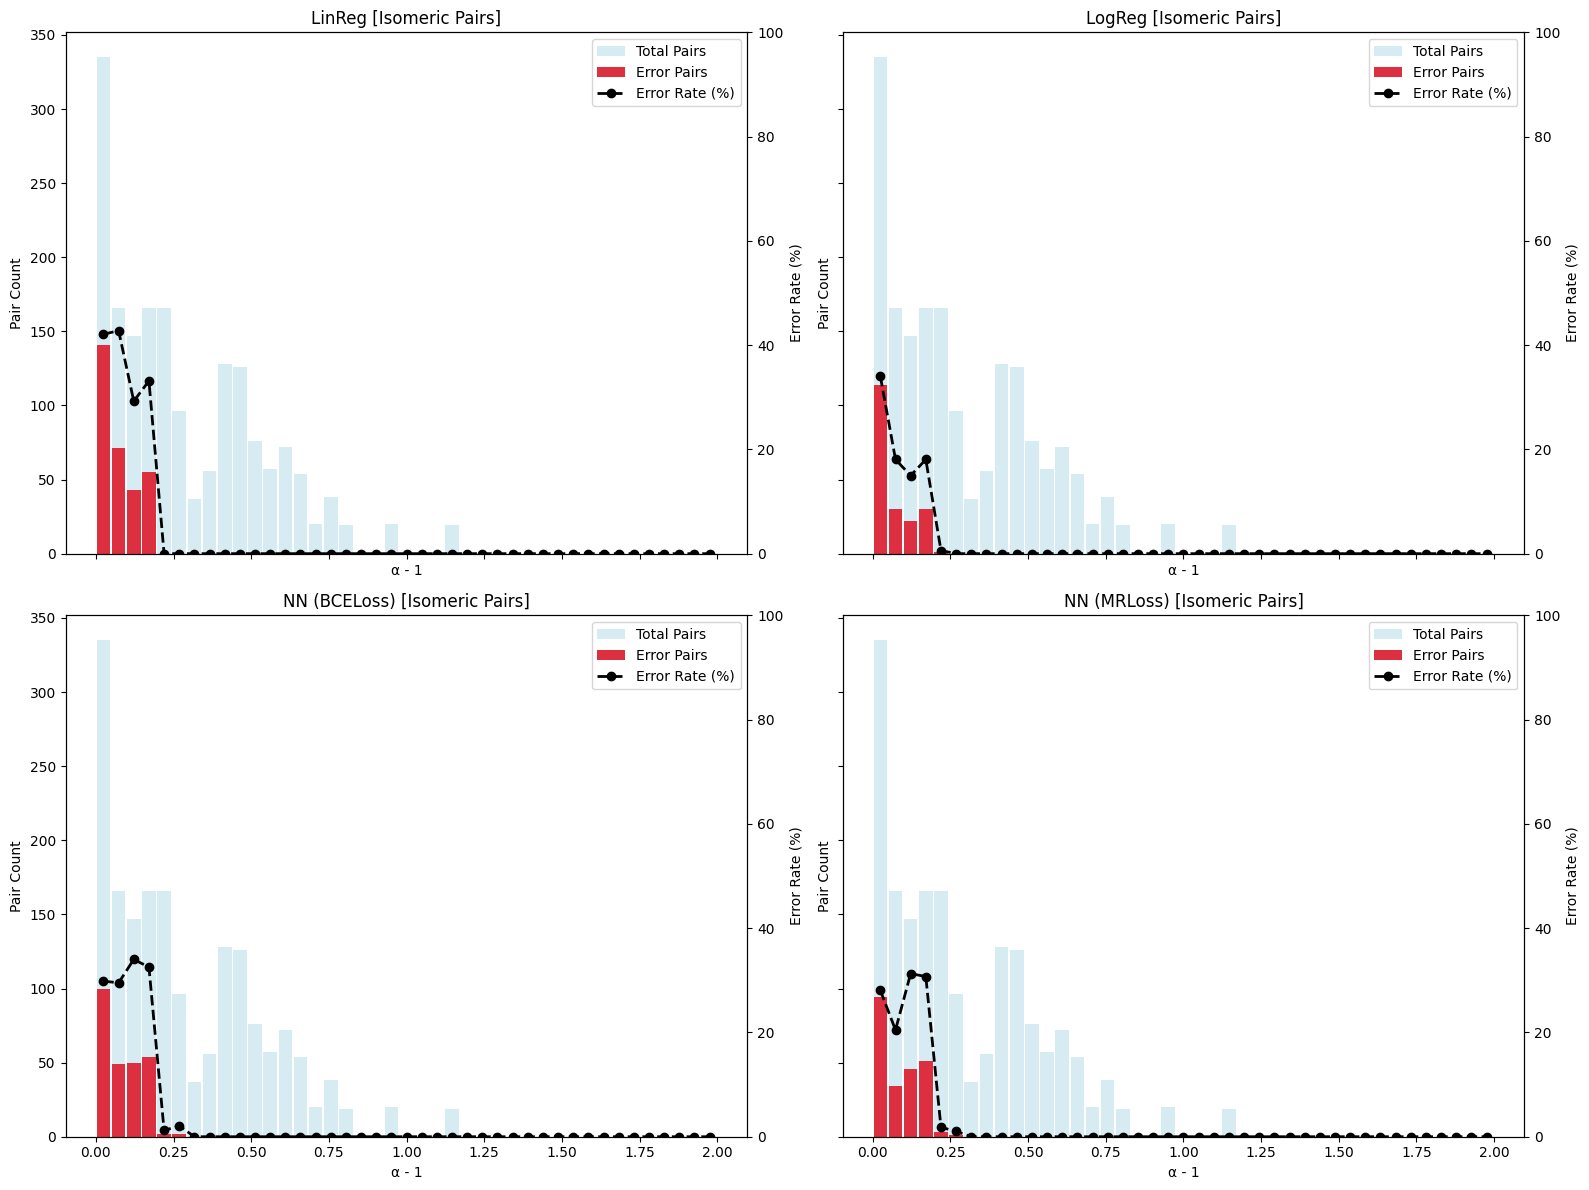

In [390]:
plot_rel_diff_error_distribution_tile_from_dfs(d_sets,['LinReg','LogReg','NN (BCELoss)','NN (MRLoss)'],isomeric_only=True,bin_edges=np.linspace(0, 2.0, 42))

## Statistical tests

In [391]:
from scipy.stats import friedmanchisquare
LinReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LinReg.csv')
LogReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LogReg.csv')
BCE_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNBCE.csv')
MRLoss_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNMR.csv')

i = 1
scores = {'LinReg':LinReg_nested[:,i].reshape(-1),'LogReg':LogReg_nested[:,i].reshape(-1),'NNBCE':BCE_nested[:,i].reshape(-1),'NNMR':MRLoss_nested[:,i].reshape(-1)}
df = pd.DataFrame(scores)

stat, p = friedmanchisquare(scores['LinReg'],scores['LogReg'],scores['NNBCE'],scores['NNMR'])
p

1.1938644068087656e-10

In [394]:
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare, wilcoxon
from statsmodels.stats.multitest import multipletests
i = 3
# Your data (example: i=3)
scores = {
    'LinReg': LinReg_nested[:, i].reshape(-1) * 100, 
    'LogReg92': LogReg_nested[:, i].reshape(-1) * 100,
    'NNBCE': BCE_nested[:, i].reshape(-1) * 100,
    'NNMR': MRLoss_nested[:, i].reshape(-1) * 100
}
df = pd.DataFrame(scores)

# 🔹 Friedman test
stat, p = friedmanchisquare(*[df[col] for col in df.columns])
print(f"Friedman statistic={stat:.3f}, p={p:.4g}")

# 🔹 Pairwise comparisons with Wilcoxon + Holm correction
pairs = []
raw_pvals = []
mean_diffs = []
ci_lower = []
ci_upper = []

def bootstrap_ci(x, y, n_boot=5000, alpha=0.05):
    """Bootstrap CI for mean difference x-y."""
    diffs = x - y
    boot_means = []
    for _ in range(n_boot):
        sample = np.random.choice(diffs, size=len(diffs), replace=True)
        boot_means.append(sample.mean())
    low = np.percentile(boot_means, 100 * alpha / 2)
    high = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return diffs.mean(), low, high

for m1 in df.columns:
    for m2 in df.columns:
        if m1 >= m2:  # avoid repeats
            continue
        # Wilcoxon test on paired fold results
        _, p_val = wilcoxon(df[m1], df[m2])
        raw_pvals.append(p_val)
        pairs.append((m1, m2))

        # Effect size: mean ± bootstrap CI
        mean_diff, low, high = bootstrap_ci(df[m1].values, df[m2].values)
        mean_diffs.append(mean_diff)
        ci_lower.append(low)
        ci_upper.append(high)

# Holm correction
reject, pvals_corr, _, _ = multipletests(raw_pvals, method="holm")

# Report results
results = pd.DataFrame({
    "Pair": pairs,
    "MeanDiff": mean_diffs,
    "95%CI_low": ci_lower,
    "95%CI_high": ci_upper,
    "p_raw": raw_pvals,
    "p_corr": pvals_corr,
    "Significant": reject
})

results

Friedman statistic=27.151, p=5.473e-06


,Pair,MeanDiff,95%CI_low,95%CI_high,p_raw,p_corr,Significant
0,"(LinReg, LogReg92)",6.172750,4.665478,7.714628,1.668379e-07,0.000001,True
1,"(LinReg, NNBCE)",3.060897,1.468261,4.651167,1.190697e-03,0.004763,True
2,"(LinReg, NNMR)",4.570239,2.926047,6.256018,5.680464e-06,0.000028,True
3,"(LogReg92, NNBCE)",-3.111853,-5.005240,-1.259516,5.951457e-03,0.017854,True
4,"(LogReg92, NNMR)",-1.602511,-3.567275,0.325441,9.371283e-02,0.093713,False
5,"(NNBCE, NNMR)",1.509342,-0.015403,2.913756,3.531078e-02,0.070622,False


## ILD Metrics

In [395]:
LinRegPairM = pd.read_csv(output_dir/'ILD_results_p1/LinRegPairM.csv',index_col='DOI')
LogRegPairM = pd.read_csv(output_dir/'ILD_results_p1/LogRegPairM.csv',index_col='DOI')
BCEPairM = pd.read_csv(output_dir/'ILD_results_p1/NNBCEPairM.csv',index_col='DOI')
MRLossPairM = pd.read_csv(output_dir/'ILD_results_p1/NNMRPairM.csv',index_col='DOI')

In [396]:
LinRegRegM = pd.read_csv(output_dir/'ILD_results_p1/LinRegRegM.csv',index_col='DOI')
LogRegRegM = pd.read_csv(output_dir/'ILD_results_p1/LogRegRegM.csv',index_col='DOI')
BCERegM = pd.read_csv(output_dir/'ILD_results_p1/NNBCERegM.csv',index_col='DOI')
MRLossRegM = pd.read_csv(output_dir/'ILD_results_p1/NNMRRegM.csv',index_col='DOI')

### Pairwise Metrics

In [397]:
PERs = pd.DataFrame(LinRegPairM['PER'])
PERs.rename(columns={'PER':'LinReg'},inplace=True)
PERs['LogReg'] = LogRegPairM['PER']
PERs['BCE'] = BCEPairM['PER']
PERs['MRLoss'] = MRLossPairM['PER']
PERs['NPairs'] = LogRegPairM['n_pairs']
for column in PERs.columns[:-1]:
    print(f'{column} weighted mean PER %:',(PERs[column]*PERs['NPairs']).sum()/PERs['NPairs'].sum()*100)

LinReg weighted mean PER %: 7.09534368070953
LogReg weighted mean PER %: 6.452328159645228
BCE weighted mean PER %: 8.234376283156765
MRLoss weighted mean PER %: 7.328159645232812


In [434]:
iPERs = pd.DataFrame(LinRegPairM['iPER'])
iPERs.rename(columns={'iPER':'LinReg'},inplace=True)
iPERs['LogReg'] = LogRegPairM['iPER']
iPERs['BCE'] = BCEPairM['iPER']
iPERs['MRLoss'] = MRLossPairM['iPER']
iPERs['NPairs'] = LogRegPairM['n_ipairs']
for column in iPERs.columns[:-1]:
    print(f'{column} weighted mean iPER %:',(iPERs[column]*iPERs['NPairs']).sum()/iPERs['NPairs'].sum()*100)

LinReg weighted mean iPER %: 30.0
LogReg weighted mean iPER %: 23.333333333333332
BCE weighted mean iPER %: 13.333333333333334
MRLoss weighted mean iPER %: 26.666666666666668


### Regression Metrics

In [407]:
# Without biggest article
MAPE_reg = pd.DataFrame(LinRegRegM['MAPE_reg'])
MAPE_reg.rename(columns={'MAPE_reg':'LinReg'},inplace=True)
MAPE_reg['LogReg'] = LogRegRegM['MAPE_reg']
MAPE_reg['BCE'] = BCERegM['MAPE_reg']
MAPE_reg['MRLoss'] = MRLossRegM['MAPE_reg']
MAPE_reg['NSamples'] = LogRegRegM['n_samples']
# MAPE_reg.drop(index='https://doi.org/10.1016/S0021-9673(01)95521-9',inplace=True)
for column in MAPE_reg.columns[:-1]:
    print(f'{column} weighted mean MAPE_reg %:',(MAPE_reg[column]*MAPE_reg['NSamples']).sum()/MAPE_reg['NSamples'].sum())

LinReg weighted mean MAPE_reg %: 13.613172595345022
LogReg weighted mean MAPE_reg %: 11.404256938986721
BCE weighted mean MAPE_reg %: 14.636384799194307
MRLoss weighted mean MAPE_reg %: 11.613040929766008


In [406]:
# Without biggest article
MedAPE_reg = pd.DataFrame(LinRegRegM['MedAPE_reg'])
MedAPE_reg.rename(columns={'MedAPE_reg':'LinReg'},inplace=True)
MedAPE_reg['LogReg'] = LogRegRegM['MedAPE_reg']
MedAPE_reg['BCE'] = BCERegM['MedAPE_reg']
MedAPE_reg['MRLoss'] = MRLossRegM['MedAPE_reg']
MedAPE_reg['NSamples'] = LogRegRegM['n_samples']
# MedAPE_reg.drop(index='https://doi.org/10.1016/S0021-9673(01)95521-9',inplace=True)
for column in MedAPE_reg.columns[:-1]:
    print(f'{column} weighted mean MedAPE_reg %:',(MedAPE_reg[column]*MedAPE_reg['NSamples']).sum()/MedAPE_reg['NSamples'].sum())

LinReg weighted mean MedAPE_reg %: 11.02241317650889
LogReg weighted mean MedAPE_reg %: 8.587228840778975
BCE weighted mean MedAPE_reg %: 11.185359850323485
MRLoss weighted mean MedAPE_reg %: 8.357197583888928


In [408]:
# Without biggest article
MAPE_int = pd.DataFrame(LinRegRegM['MAPE_int'])
MAPE_int.rename(columns={'MAPE_int':'LinReg'},inplace=True)
MAPE_int['LogReg'] = LogRegRegM['MAPE_int']
MAPE_int['BCE'] = BCERegM['MAPE_int']
MAPE_int['MRLoss'] = MRLossRegM['MAPE_int']
MAPE_int['NSamples'] = LogRegRegM['n_samples']
# MAPE_int.drop(index='https://doi.org/10.1016/S0021-9673(01)95521-9',inplace=True)
for column in MAPE_int.columns[:-1]:
    print(f'{column} weighted mean MAPE_int %:',(MAPE_int[column]*MAPE_int['NSamples']).sum()/MAPE_int['NSamples'].sum())

LinReg weighted mean MAPE_int %: 9.208057374806094
LogReg weighted mean MAPE_int %: 8.701257380809343
BCE weighted mean MAPE_int %: 11.372318543096785
MRLoss weighted mean MAPE_int %: 10.072480192113218


In [409]:
# Without biggest article
MedAPE_int = pd.DataFrame(LinRegRegM['MedAPE_int'])
MedAPE_int.rename(columns={'MedAPE_int':'LinReg'},inplace=True)
MedAPE_int['LogReg'] = LogRegRegM['MedAPE_int']
MedAPE_int['BCE'] = BCERegM['MedAPE_int']
MedAPE_int['MRLoss'] = MRLossRegM['MedAPE_int']
MedAPE_int['NSamples'] = LogRegRegM['n_samples']
# MedAPE_int.drop(index='https://doi.org/10.1016/S0021-9673(01)95521-9',inplace=True)
for column in MedAPE_int.columns[:-1]:
    print(f'{column} weighted mean MedAPE_int %:',(MedAPE_int[column]*MedAPE_int['NSamples']).sum()/MedAPE_int['NSamples'].sum())

LinReg weighted mean MedAPE_int %: 7.88801279133883
LogReg weighted mean MedAPE_int %: 7.015294518400199
BCE weighted mean MedAPE_int %: 9.261431825986207
MRLoss weighted mean MedAPE_int %: 9.320600830438611


# Part II 

## BoxPlots

In [404]:
LogReg20 = np.genfromtxt(output_dir/'IDB_results_p2/Log20R2.csv')
LogReg92 = np.genfromtxt(output_dir/'IDB_results_p2/Log92R2.csv')
BCE = np.genfromtxt(output_dir/'IDB_results_p2/NNBCER2.csv')
MRLoss = np.genfromtxt(output_dir/'IDB_results_p2/NNMRR2.csv')

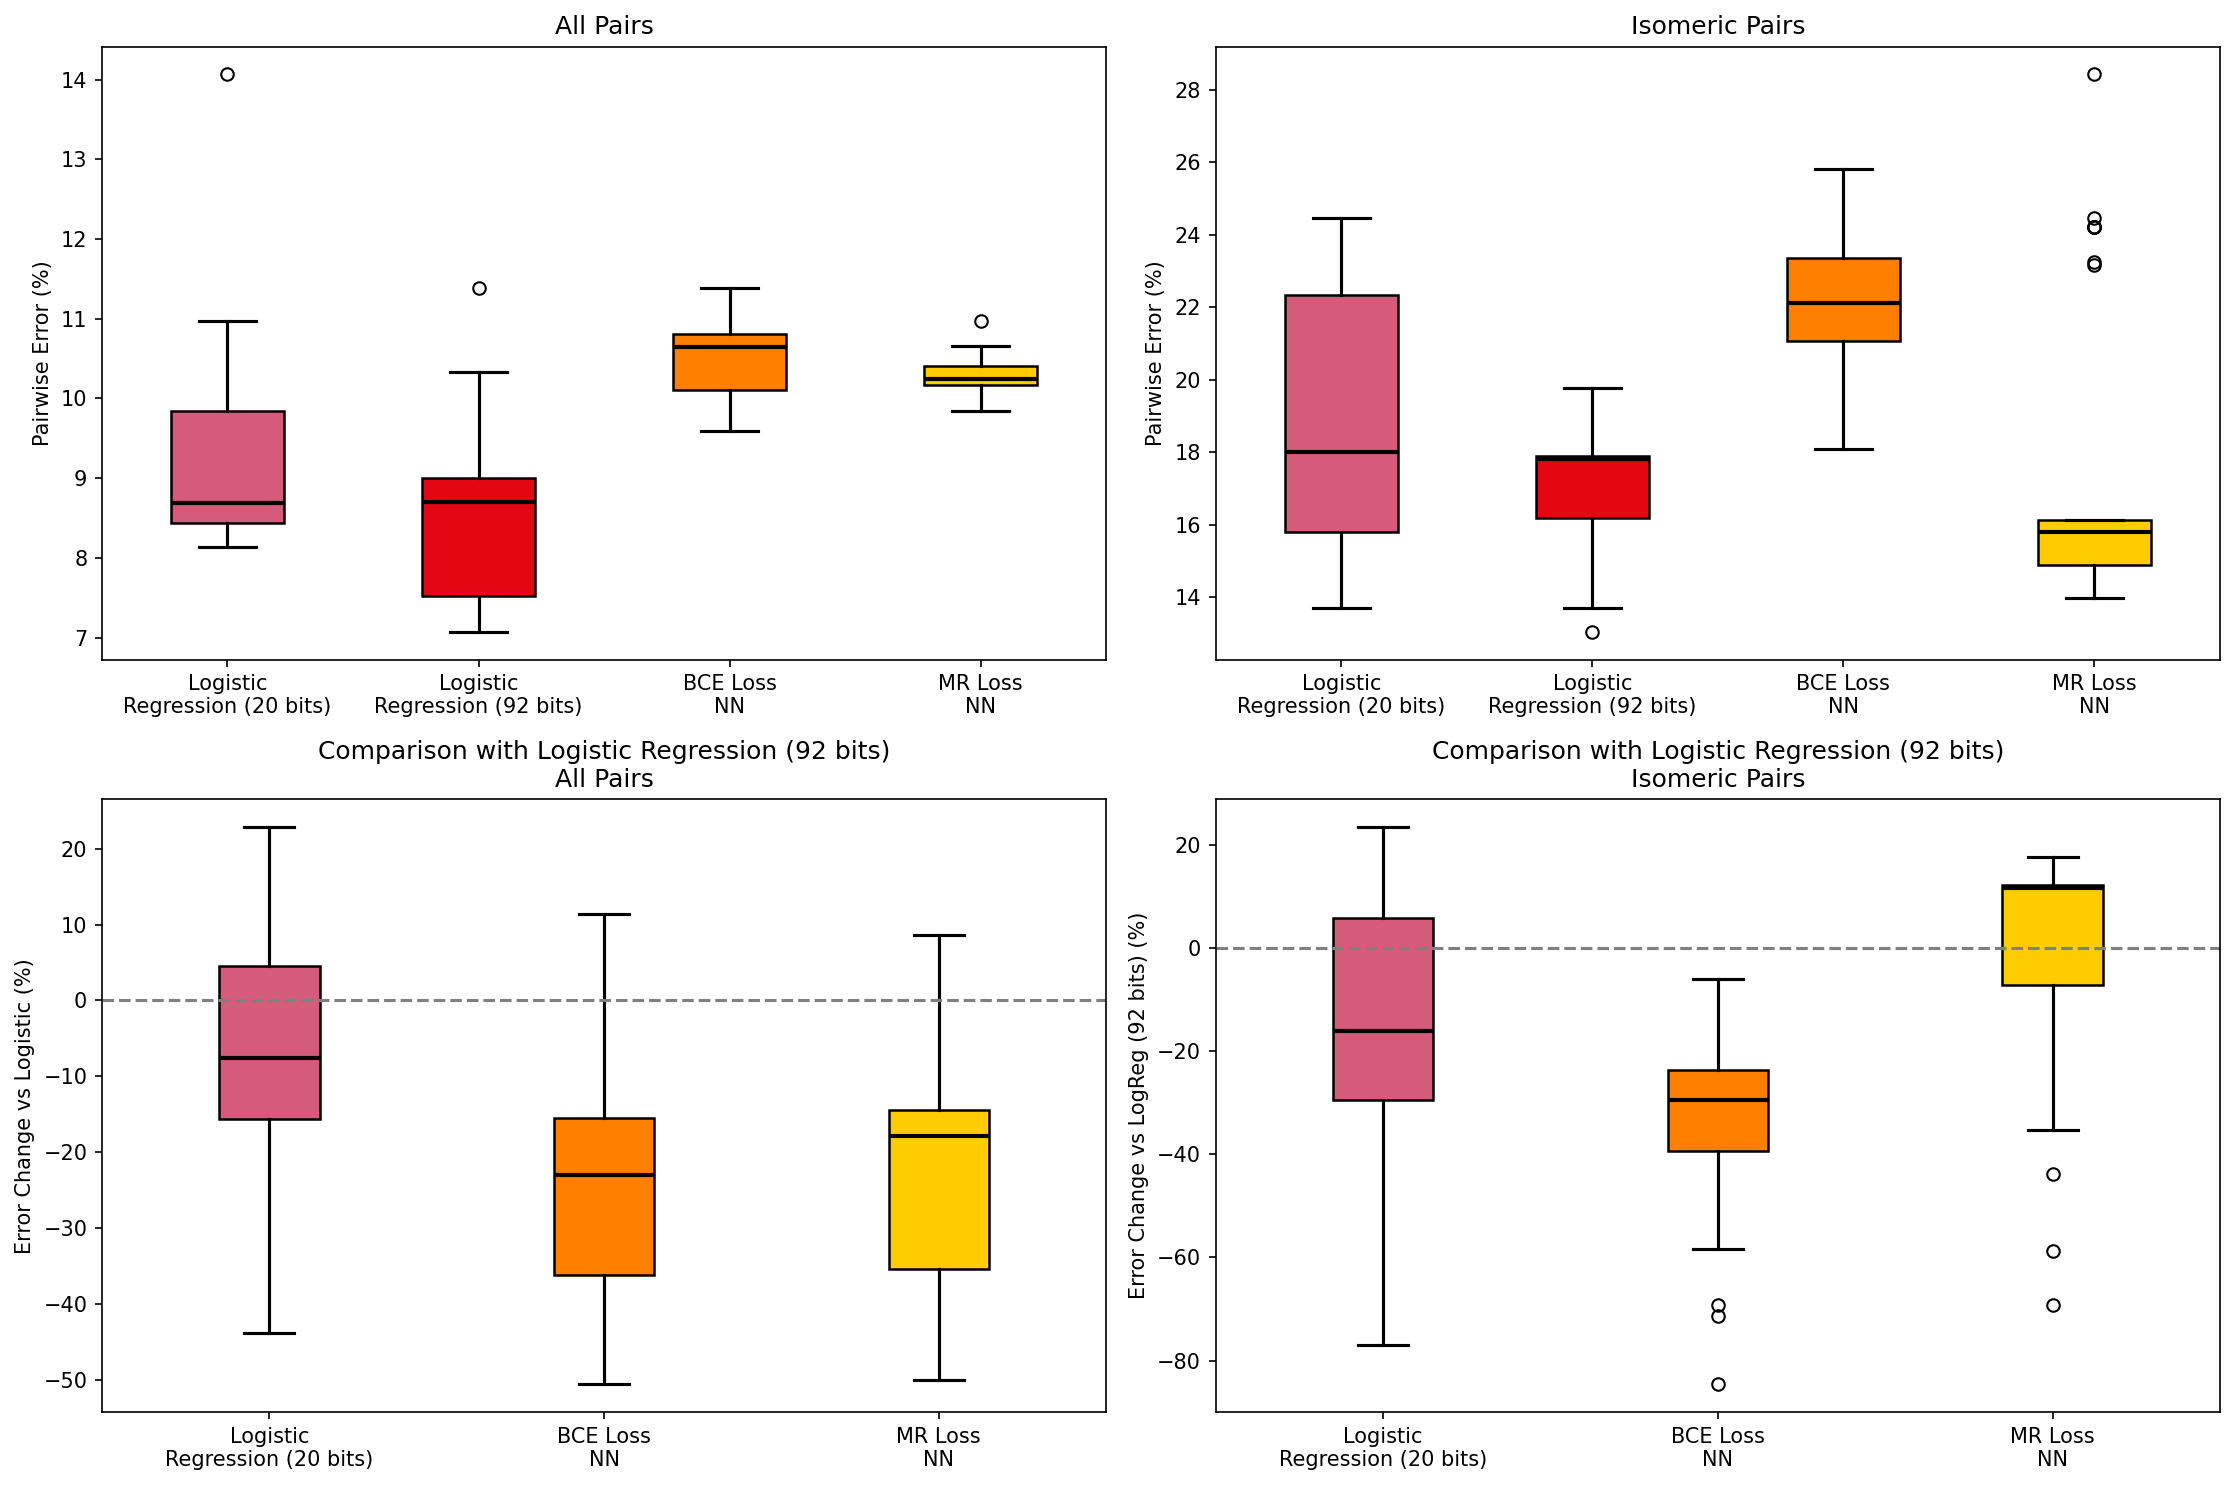

In [410]:
# Setup model names and colors
model_names_all = [
    'Logistic\nRegression (20 bits)',
    'Logistic\nRegression (92 bits)',
    'BCE Loss\nNN',
    'MR Loss\nNN'
]
colors_all = ['#d45c7a', '#e30613', '#ff7f00', '#ffcc00']

model_names_sub = ['Logistic\nRegression (20 bits)', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_sub = ['#d45c7a', '#ff7f00', '#ffcc00']

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=150)

def stylize_boxplot(boxplot, colors):
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.2)
    for median in boxplot['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    for whisker in boxplot['whiskers']:
        whisker.set_color('black')
        whisker.set_linewidth(1.5)
    for cap in boxplot['caps']:
        cap.set_color('black')
        cap.set_linewidth(1.5)

# --- Plot 1: All Pairs (PER * 100) ---
i = 1
PER_data1 = [LogReg20[:, i]*100, LogReg92[:, i]*100, BCE[:, i]*100, MRLoss[:, i]*100]
box1 = axes[0, 0].boxplot(PER_data1, patch_artist=True)
stylize_boxplot(box1, colors_all)
axes[0, 0].set_title('All Pairs')
axes[0, 0].set_ylabel('Pairwise Error (%)')
axes[0, 0].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 0].set_xticklabels(model_names_all)

# --- Plot 2: Isomeric Pairs (PER * 100) ---
i = 3
PER_data2 = [LogReg20[:, i]*100, LogReg92[:, i]*100, BCE[:, i]*100, MRLoss[:, i]*100]
box2 = axes[0, 1].boxplot(PER_data2, patch_artist=True)
stylize_boxplot(box2, colors_all)
axes[0, 1].set_title('Isomeric Pairs')
axes[0, 1].set_ylabel('Pairwise Error (%)')
axes[0, 1].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 1].set_xticklabels(model_names_all)

# --- Plot 3: Comparison to Logistic Regression (All Pairs) ---
i = 1
baseline = LogReg92[:, i]
PER_data3 = [
    100 * (baseline-LogReg20[:, i]) / baseline,
    100 * (baseline-BCE[:, i]) / baseline,
    100 * (baseline-MRLoss[:, i]) / baseline
]
box3 = axes[1, 0].boxplot(PER_data3, patch_artist=True)
stylize_boxplot(box3, colors_sub)
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 0].set_title('Comparison with Logistic Regression (92 bits)\nAll Pairs')
axes[1, 0].set_ylabel('Error Change vs Logistic (%)')
axes[1, 0].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 0].set_xticklabels(model_names_sub)

# --- Plot 4: Comparison to Logistic Regression (Isomeric Pairs) ---
i = 3
baseline = LogReg92[:, i]
PER_data4 = [
    100 * (baseline-LogReg20[:, i]) / baseline,
    100 * (baseline-BCE[:, i]) / baseline,
    100 * (baseline-MRLoss[:, i]) / baseline
]
box4 = axes[1, 1].boxplot(PER_data4, patch_artist=True)
stylize_boxplot(box4, colors_sub)
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 1].set_title('Comparison with Logistic Regression (92 bits)\nIsomeric Pairs')
axes[1, 1].set_ylabel('Error Change vs LogReg (92 bits) (%)')
axes[1, 1].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 1].set_xticklabels(model_names_sub)

plt.tight_layout()
plt.show()
# fig.savefig("BoxPlots_vs_LogRegP2.png", dpi=600, bbox_inches='tight')


## Actual values

### Logistic Regression (20 bits)

In [412]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LogReg20[:, 0]), np.std(LogReg20[:, 0],ddof=1) 
PER_mixed_mean, PER_mixed_std = np.mean(LogReg20[:, 1]), np.std(LogReg20[:, 1],ddof=1) 

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LogReg20[:, 2], LogReg20[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LogReg20[:, 3], LogReg20[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 9.2 ± 1.3
PER (mixed)    : 9.2 ± 1.1
iPER (test)    : 19.7 ± 4.5
iPER (mixed)   : 18.9 ± 3.5


### Logistic Regression (92 bits)

In [413]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LogReg92[:, 0]), np.std(LogReg92[:, 0],ddof=1) 
PER_mixed_mean, PER_mixed_std = np.mean(LogReg92[:, 1]), np.std(LogReg92[:, 1],ddof=1) 

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LogReg92[:, 2], LogReg92[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LogReg92[:, 3], LogReg92[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 8.7 ± 1.3
PER (mixed)    : 8.7 ± 1.0
iPER (test)    : 17.2 ± 4.2
iPER (mixed)   : 17.0 ± 1.6


### NN BCELoss

In [414]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(BCE[:, 0]), np.std(BCE[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(BCE[:, 1]), np.std(BCE[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(BCE[:, 2], BCE[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(BCE[:, 3], BCE[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 10.6 ± 1.1
PER (mixed)    : 10.53 ± 0.45
iPER (test)    : 22.9 ± 4.0
iPER (mixed)   : 22.2 ± 1.9


### NN MRLoss

In [415]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(MRLoss[:, 0]), np.std(MRLoss[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(MRLoss[:, 1]), np.std(MRLoss[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(MRLoss[:, 2], MRLoss[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(MRLoss[:, 3], MRLoss[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 10.11 ± 0.99
PER (mixed)    : 10.27 ± 0.2
iPER (test)    : 16.7 ± 4.7
iPER (mixed)   : 16.9 ± 3.4


## Error distributions

In [416]:
log20 = pd.read_csv(output_dir/'Accumulators'/'Log20R2.csv')
log92 = pd.read_csv(output_dir/'Accumulators'/'Log92R2.csv')
BCE = pd.read_csv(output_dir/'Accumulators'/'NNBCER2.csv')
MR = pd.read_csv(output_dir/'Accumulators'/'NNMRR2.csv')
d_sets = [log20,log92,BCE,MR]

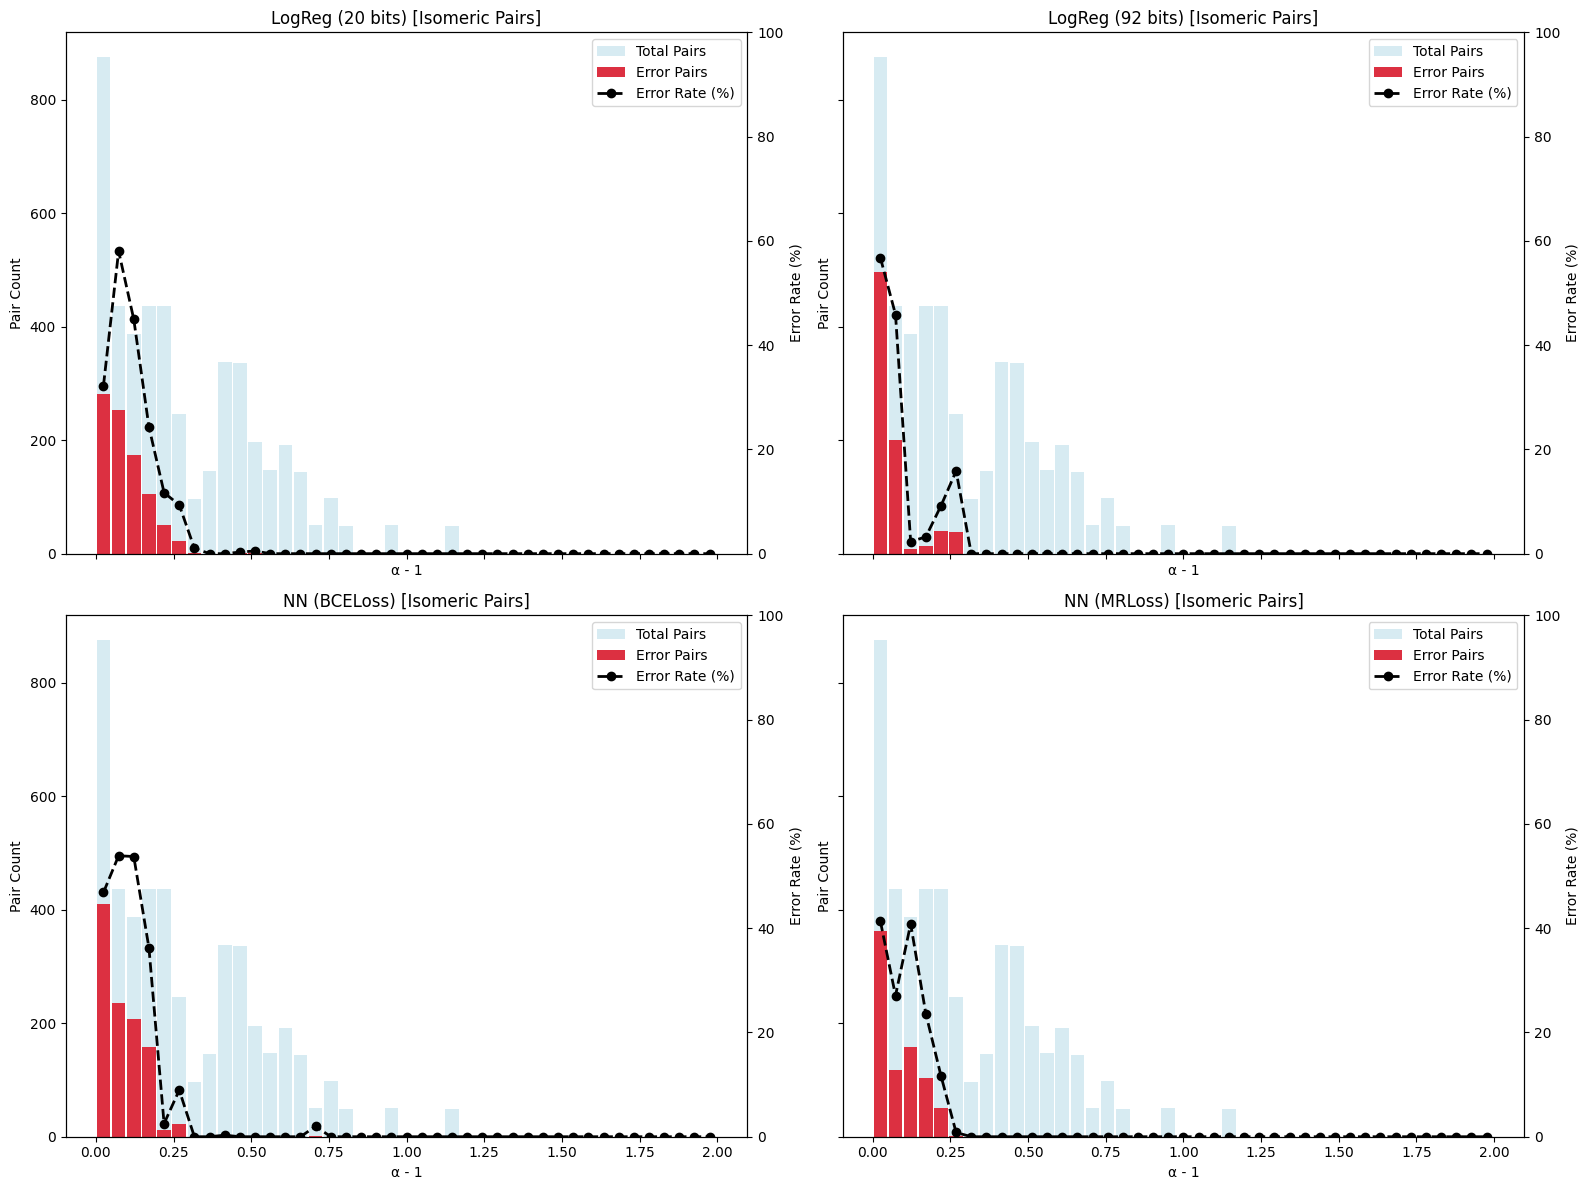

In [418]:
plot_rel_diff_error_distribution_tile_from_dfs(d_sets,['LogReg (20 bits)','LogReg (92 bits)','NN (BCELoss)','NN (MRLoss)'],isomeric_only=True,bin_edges=np.linspace(0, 2.0, 42))

## Statistical Tests

In [419]:
LogReg20 = np.genfromtxt(output_dir/'IDB_results_p2/Log20R2.csv')
LogReg92 = np.genfromtxt(output_dir/'IDB_results_p2/Log92R2.csv')
BCE = np.genfromtxt(output_dir/'IDB_results_p2/NNBCER2.csv')
MRLoss = np.genfromtxt(output_dir/'IDB_results_p2/NNMRR2.csv')

In [423]:
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare, wilcoxon
from statsmodels.stats.multitest import multipletests
i = 1
# Your data (example: i=3)
scores = {
    'LogReg20': LogReg20[:, i].reshape(-1) * 100,
    'LogReg92': LogReg92[:, i].reshape(-1) * 100,
    'NNBCE': BCE[:, i].reshape(-1) * 100,
    'NNMR': MRLoss[:, i].reshape(-1) * 100
}
df = pd.DataFrame(scores)

# 🔹 Friedman test
stat, p = friedmanchisquare(*[df[col] for col in df.columns])
print(f"Friedman statistic={stat:.3f}, p={p:.4g}")

# 🔹 Pairwise comparisons with Wilcoxon + Holm correction
pairs = []
raw_pvals = []
mean_diffs = []
ci_lower = []
ci_upper = []

def bootstrap_ci(x, y, n_boot=5000, alpha=0.05):
    """Bootstrap CI for mean difference x-y."""
    diffs = x - y
    boot_means = []
    for _ in range(n_boot):
        sample = np.random.choice(diffs, size=len(diffs), replace=True)
        boot_means.append(sample.mean())
    low = np.percentile(boot_means, 100 * alpha / 2)
    high = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return diffs.mean(), low, high

for m1 in df.columns:
    for m2 in df.columns:
        if m1 >= m2:  # avoid repeats
            continue
        # Wilcoxon test on paired fold results
        _, p_val = wilcoxon(df[m1], df[m2])
        raw_pvals.append(p_val)
        pairs.append((m1, m2))

        # Effect size: mean ± bootstrap CI
        mean_diff, low, high = bootstrap_ci(df[m1].values, df[m2].values)
        mean_diffs.append(mean_diff)
        ci_lower.append(low)
        ci_upper.append(high)

# Holm correction
reject, pvals_corr, _, _ = multipletests(raw_pvals, method="holm")

# Report results
results = pd.DataFrame({
    "Pair": pairs,
    "MeanDiff": mean_diffs,
    "95%CI_low": ci_lower,
    "95%CI_high": ci_upper,
    "p_raw": raw_pvals,
    "p_corr": pvals_corr,
    "Significant": reject
})

results.round(3)

Friedman statistic=74.133, p=5.557e-16


,Pair,MeanDiff,95%CI_low,95%CI_high,p_raw,p_corr,Significant
0,"(LogReg20, LogReg92)",0.494,0.115,0.872,0.027,0.027,True
1,"(LogReg20, NNBCE)",-1.384,-1.735,-0.982,0.000,0.000,True
2,"(LogReg20, NNMR)",-1.118,-1.405,-0.797,0.000,0.000,True
3,"(LogReg92, NNBCE)",-1.878,-2.182,-1.552,0.000,0.000,True
4,"(LogReg92, NNMR)",-1.612,-1.900,-1.313,0.000,0.000,True
5,"(NNBCE, NNMR)",0.265,0.126,0.399,0.000,0.001,True
